Accuracy: 0.9912, Precision: 0.9571, Recall: 0.9306
Training time: 00:00:008702


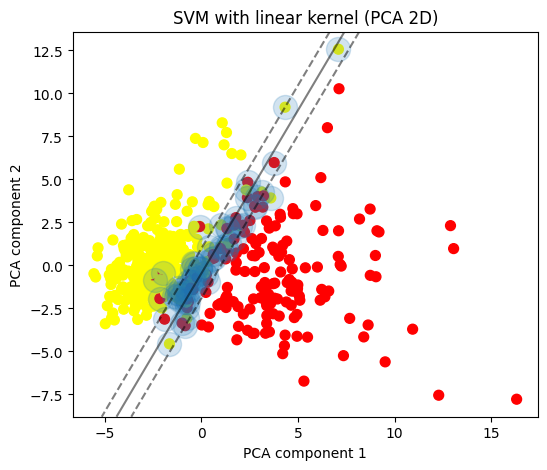

Accuracy: 0.9561, Precision: 0.9571, Recall: 0.9306
Training time: 00:00:027656


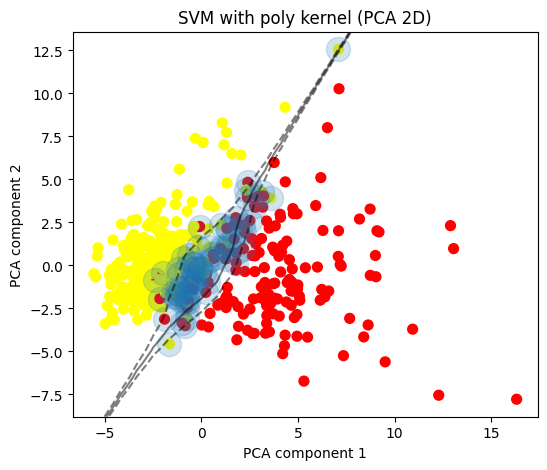

Accuracy: 0.9825, Precision: 0.9571, Recall: 0.9306
Training time: 00:00:014635


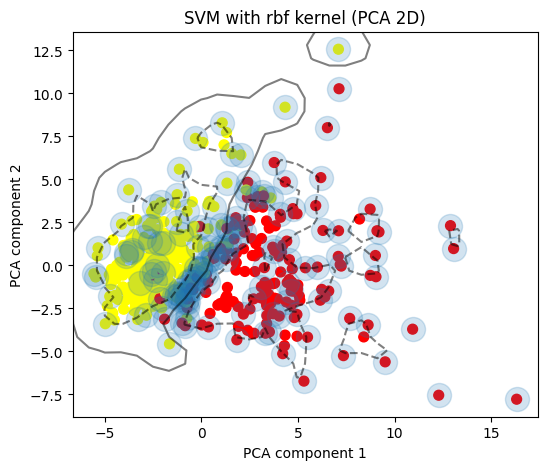

Accuracy: 0.9035, Precision: 0.9571, Recall: 0.9306
Training time: 00:00:008620


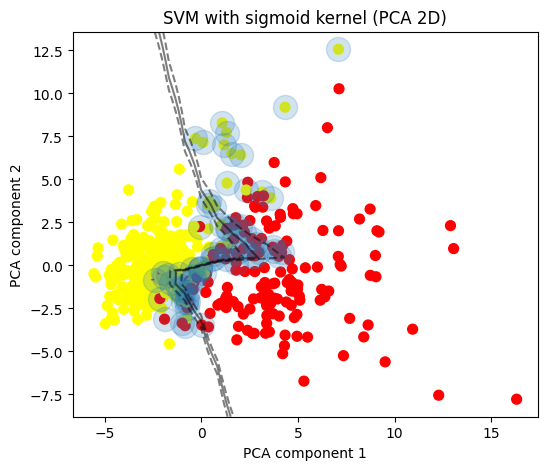

predictions: [1 0 0 1 1 0 0 0 0]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time
import datetime

# Load dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target  # 0 = malignant, 1 = benign

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Function to plot decision boundary from the example-code
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, alpha=0.2)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Test different kernels
Kernel = ["linear", "poly", "rbf", "sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel, gamma='auto', degree=3, cache_size=5000)
    clf.fit(X_train, Y_train)

    acc = clf.score(X_test, Y_test)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    print("Training time:", datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

    # Plot decision boundary for 2D PCA features
    plt.figure(figsize=(6,5))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='autumn')
    plot_svc_decision_function(clf)
    plt.title(f"SVM with {kernel} kernel (PCA 2D)")
    plt.xlabel("PCA component 1")
    plt.ylabel("PCA component 2")
    plt.show()

# Predict on test set with last kernel
Y_pred = clf.predict(X_test)
print("predictions:", Y_pred[:9])
